In [35]:
import os
import random
from PIL import Image

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torchvision import transforms

### Displaying random image from each class

In [10]:
labels = os.listdir('Rice_Image_Dataset/')
labels

['Karacadag', 'Ipsala', 'Arborio', 'Basmati', 'Jasmine']

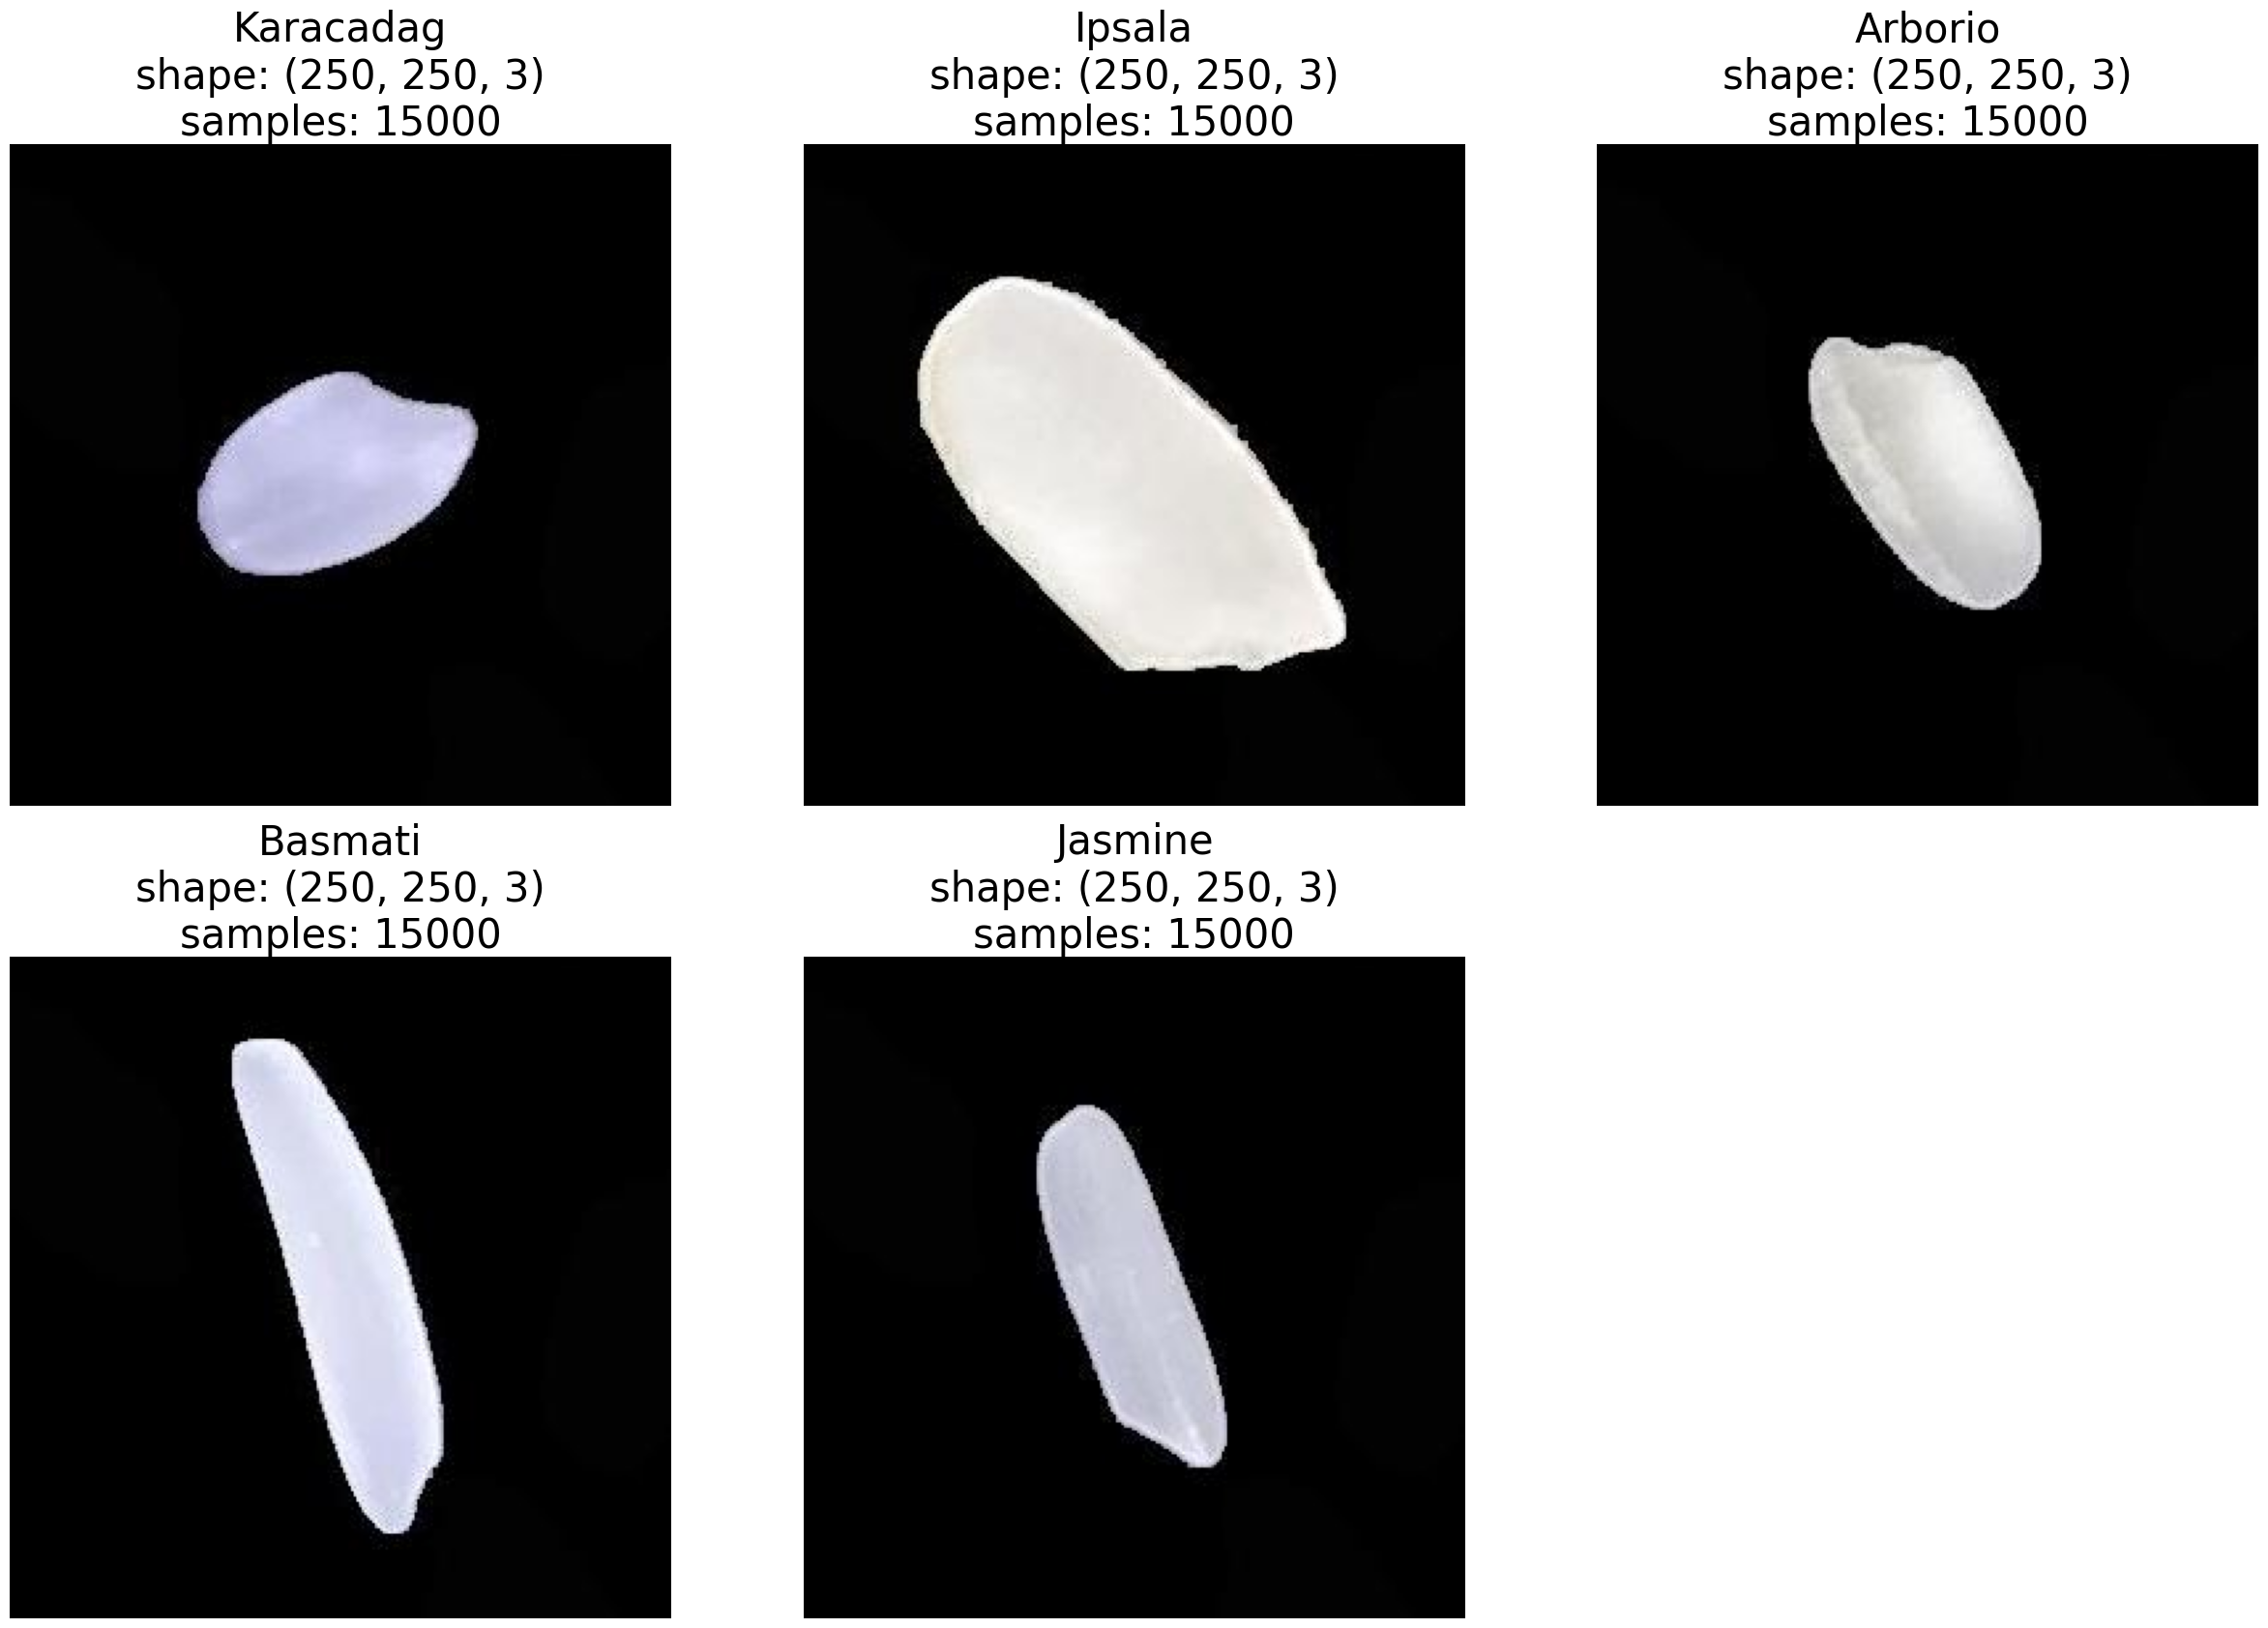

In [22]:
plt.figure(figsize=(30, 20))
for i, label in enumerate(labels):
    img_path = os.path.join('Rice_Image_Dataset', label)
    imgs = os.listdir(img_path)
    n_images = len(imgs)
    img = random.choice(imgs)
    img = plt.imread(os.path.join(img_path, img))
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(f'{label}\nshape: {img.shape}\nsamples: {n_images}', fontsize=30)
    plt.axis('off')

### Dataset preparation

In [37]:
class RiceImageDataset(Dataset):
    def __init__(self, img_dir):
        self.img_dir = img_dir
        self.class_folders = sorted(os.listdir(img_dir))
        self.data = []
        self.labels = []
        self.class_to_idx = {}

        for i, class_folder in enumerate(self.class_folders):
            class_path = os.path.join(img_dir, class_folder)
            for img in os.listdir(class_path):
                img_path = os.path.join(class_path, img)
                self.data.append(img_path)
                self.labels.append(i)
                self.class_to_idx[class_folder] = i
                
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        image_path = self.data[idx]
        labels = self.labels[idx]
        image = Image.open(image_path)
        return image, labels


In [36]:
train_transfroms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(90),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
test_transfroms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
])

In [38]:
dataset = RiceImageDataset('Rice_Image_Dataset/')

In [40]:
dataset.class_to_idx

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}